<a href="https://colab.research.google.com/github/ezraflavine/python_week8_covid_assignment/blob/main/Owid_covid_19_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Owid covid-19 Data Exploration**

**Load and raed the dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/owid-covid-data.csv.zip"
df = pd.read_csv(file_path)


df.shape

(220343, 67)

In [ ]:
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

**Cleaning and Preparing the dataset**

In [ ]:
# Check for missing values in key columns
key_columns = ['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
missing_values = df[key_columns].isnull().sum()

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Show missing values
missing_values


,0
date,0
location,0
total_cases,8966
total_deaths,28070
new_cases,9231
new_deaths,28128
total_vaccinations,158619


In [ ]:
# Select countries of interest
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)].copy()

# Drop rows where date is missing
df_filtered.dropna(subset=['total_cases', 'total_deaths'], inplace=True)

# Interpolate numeric columns to fill gaps
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
df_filtered[numeric_cols] = df_filtered[numeric_cols].interpolate(method='linear')

# Confirm changes
df_filtered[numeric_cols].isnull().sum()


,0
total_cases,0
total_deaths,0
new_cases,0
new_deaths,0
total_vaccinations,310


**Exploratory Analysis**

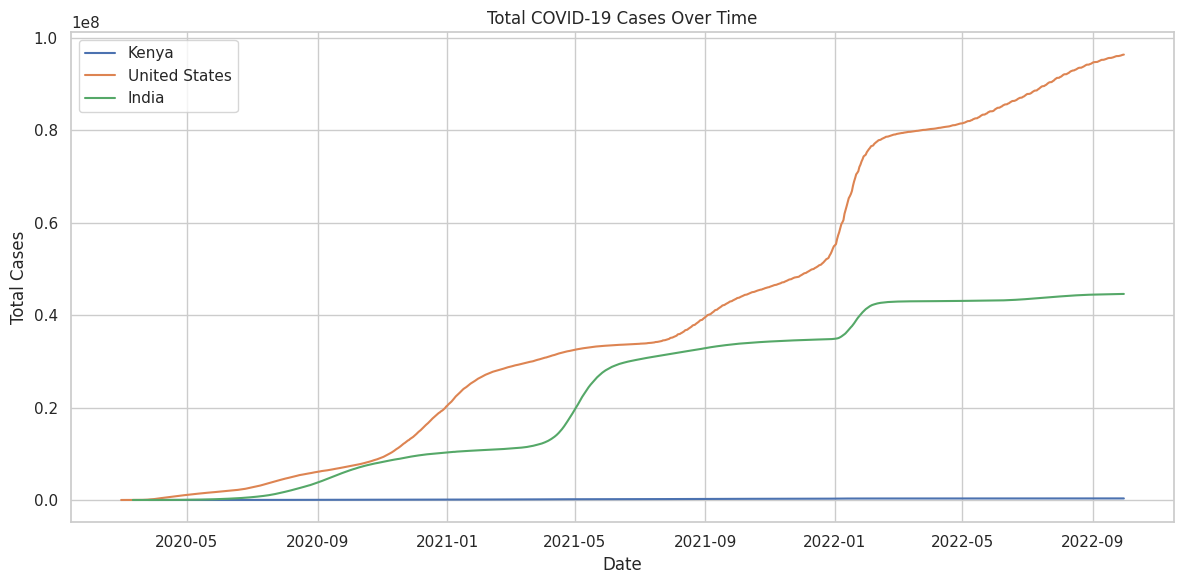

In [ ]:
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()

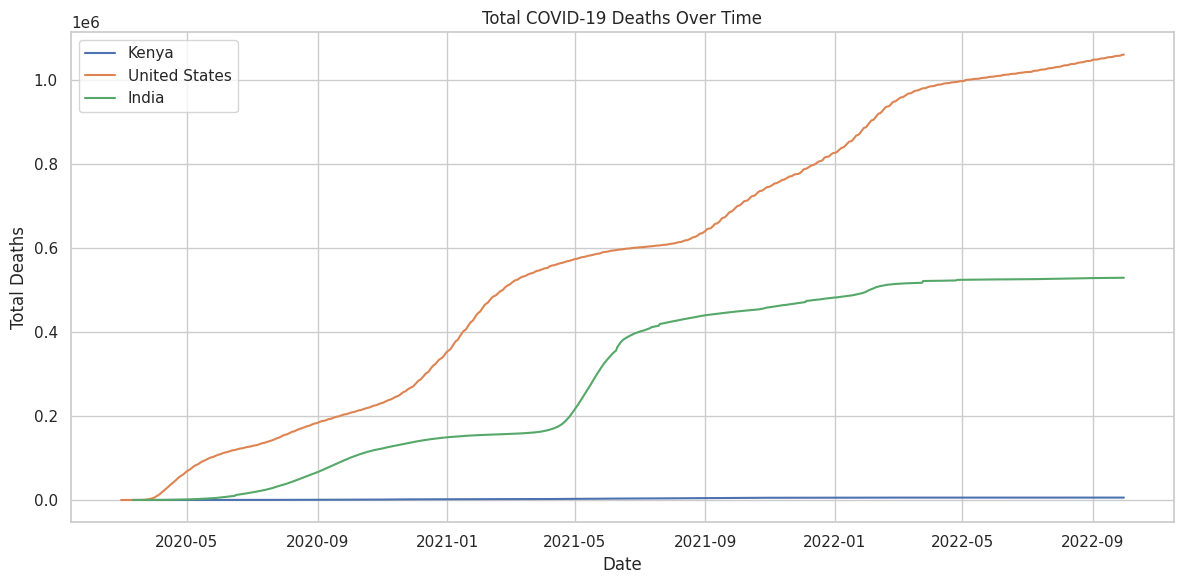

In [ ]:
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

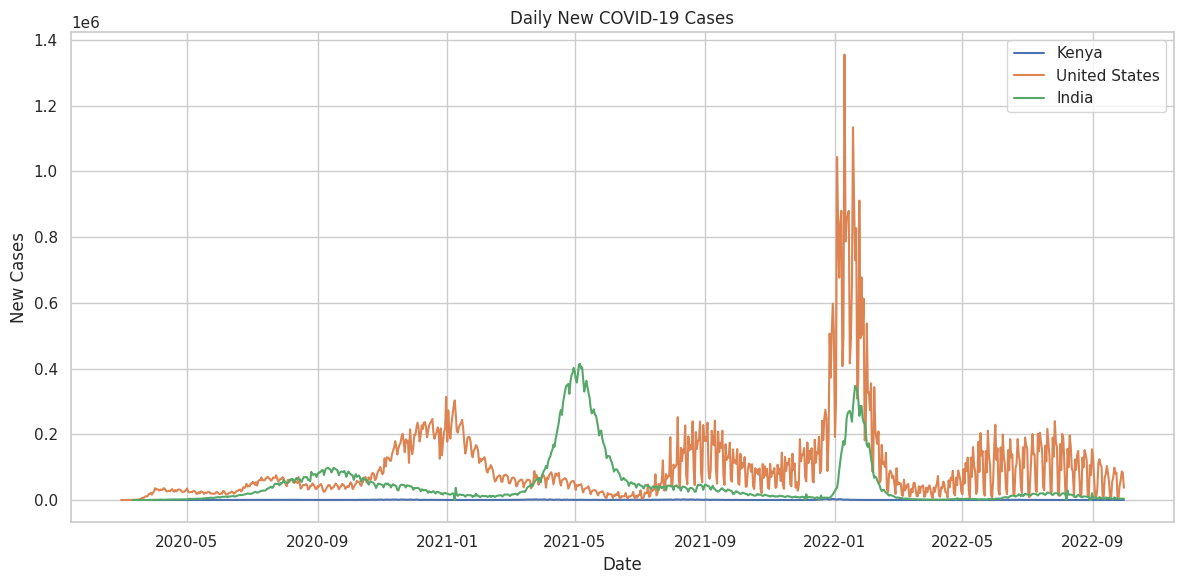

In [ ]:
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-29-8442b8cc0ed7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_df, x='location', y='death_rate', palette='Set2')


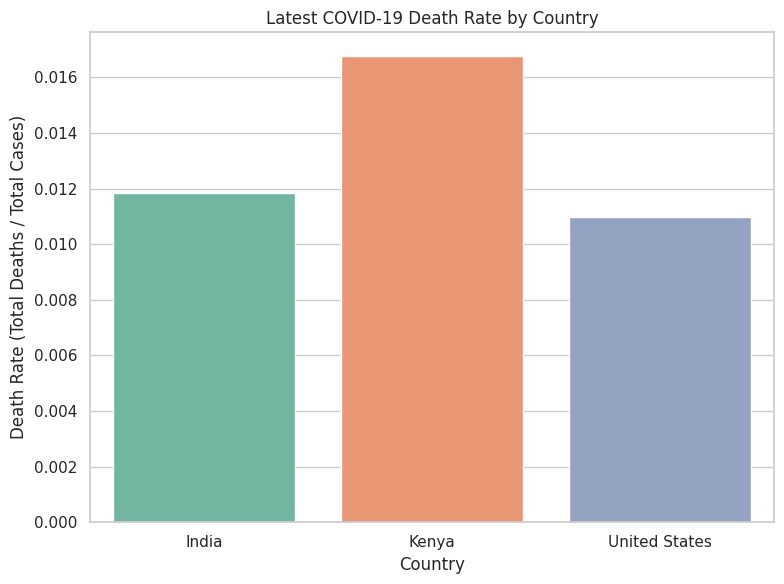

In [ ]:
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)].copy()
df_filtered.dropna(subset=['total_cases', 'total_deaths'], inplace=True)
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']

# Get the latest data for each country
latest_df = df_filtered.sort_values('date').groupby('location').tail(1)

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=latest_df, x='location', y='death_rate', palette='Set2')
plt.title('Latest COVID-19 Death Rate by Country')
plt.ylabel('Death Rate (Total Deaths / Total Cases)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


The above bar graphs measures the proportion of people who died after testing positive, not the absolute number of deaths. Even if Kenya had fewer total cases, a high proportion of those might have resulted in death and that is why Kenya is leading.

**Major Findings from COVID-19 Data Exploration**

1. **The United States: Bearing the Brunt of the Pandemic**  
The U.S. has recorded the highest number of COVID-19 cases and deaths globally, a reality driven by several key factors:
   * Its substantial population size, leading to an inevitable increase in cases.
   -  An advanced testing and reporting infrastructure that provides a clearer, albeit sobering, picture of the pandemic's impact.
   - High transmission rates, particularly during the early phases of the outbreak, exacerbated the situation.




2. **India: A Nation Awash with Waves of Infection**  
India experienced overwhelming surges in daily new cases, especially during the Delta wave from April to June 2021, when infections soared to some of the highest levels in the world. This crisis resulted in staggering numbers in total caseload, highlighting the urgency of the situation.

3. **Kenya: Lower Numbers, Alarming Death Rates**  
Despite reporting fewer cases and deaths overall, Kenya's elevated death rate (the percentage of fatalities among confirmed cases) raises serious red flags. Potential explanations for this troubling statistic include:
   - The possibility of significant underreporting of mild or asymptomatic cases due to limited testing capabilities.
   - A likely bias in reporting, where deaths are captured more rigorously than infections, skewing perceptions of risk.
   - Inequities in healthcare access and delays in reporting that could further complicate the landscape.

4. **A Positive Turn: Declining Death Rates Over Time**  
In all three countries, there is a clear and encouraging trend: the death rates (deaths per case) have gradually declined over time. This improvement can be attributed to several vital developments:
   - Enhanced treatment protocols that have significantly improved patient outcomes.
   - The rollout of vaccines, which has played a critical role in reducing the severity of the illness.
   - An increase in testing that has unveiled more mild cases, thus altering the death rate perspective.

5. **The Patterns of Infection: Distinct Waves of Challenge**  
Each of the three countries has faced unique waves of infection that reveal distinct patterns. Specifically:
   - The U.S. experienced an early onset of frequent, high-intensity waves.
   - India faced a catastrophic surge in mid-2021 that profoundly impacted its population.
   - Kenya's waves, while smaller, occurred with noticeable spacing, reflecting different dynamics at play.

 **Summary Interpretation**  
While the United States has borne the heaviest toll from COVID-19, Kenya's concerningly high death rate signals vital gaps in detection and healthcare responses that must be addressed. India's data starkly illustrates the devastating effects of the Delta variant. On a brighter note, all three countries are witnessing improving trends over time, a powerful testament to the effectiveness of vaccination campaigns and public health interventions in curbing the virus’s spread and impact.
